In [9]:
# NEURAL NETWORKS

import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from keras import models
from keras import layers
from keras import regularizers
from keras.datasets import imdb, reuters
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# PREPROCESSING DATA FOR NEURAL NETWORKS

# create feature
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# create scaler
scaler = preprocessing.StandardScaler()
# transform features
features_std = scaler.fit_transform(features)
# show features
features_std

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
# DESIGNING A NEURAL NETWORK

# start neural network
network = models.Sequential()

# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, 
                         activation='relu', 
                         input_shape=(10,)))
# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, 
                         activation='relu'))
# add fully connected layer with a sigmoid function
network.add(layers.Dense(units=1, 
                         activation='sigmoid'))

# compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop', # root mean square propagation
               metrics=['accuracy'])

In [9]:
# TRAINING A BINARY CLASSIFIER

np.random.seed(0)

# set the number of features we want
number_of_features = 1000

# load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# convert movie review data to ine-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# start neural network
network = models.Sequential()

# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                        activation='relu',
                        input_shape=(number_of_features,)))
# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                        activation='relu'))
# add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1,
                        activation='sigmoid'))

# compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=3,
                     verbose=1,
                     batch_size=100,
                     validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8175 - val_loss: 0.3324 - val_accuracy: 0.8602
Epoch 2/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8665 - val_loss: 0.3320 - val_accuracy: 0.8571
Epoch 3/3
250/250 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8682 - val_loss: 0.3258 - val_accuracy: 0.8604


In [10]:
features_train.shape

(25000, 1000)

In [6]:
# TRAINING A MULTICLASS CLASSIFIER

# set random seed
np.random.seed(0)

# set the number of features we want
number_of_features = 5000

# load feature and target data
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# one-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# start neural network
network = models.Sequential()

# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100,
                        activation='relu',
                        input_shape=(number_of_features,)))

# add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100,
                        activation='relu'))

# add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46,
                        activation='softmax'))

# compile neural network
network.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=3,
                     verbose=0,
                     batch_size=100,
                     validation_data=(features_test, target_test))

In [8]:
# TRAINING A REGRESSOR

# set random seed
np.random.seed(0)

# generate feature matrix
features, target = make_regression(n_samples=10_000,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise=0.0,
                                  random_state=0)

# divede our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# start neural network
network = models.Sequential()

# add fully connected layer with ReLU
network.add(layers.Dense(units=32,
                        activation='relu',
                        input_shape=(features_train.shape[1],)))
# add fully connected layer
network.add(layers.Dense(units=1))
# compile neural network
network.compile(loss='mse',
               optimizer='RMSprop',
               metrics=['mse'])

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=10,
                     verbose=0,
                     batch_size=100,
                     validation_data=(features_test, target_test))

In [9]:
# MAKING PREDICTIONS



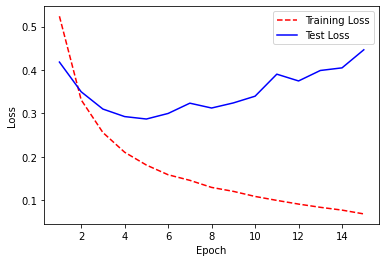

In [14]:
# VISUALIZE TRAINING HISTORY

# set random seed
np.random.seed(0)
# set the number of features
number_of_features = 10_000

# load data and target vector
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, 
                                               mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test,
                                            mode='binary')

# start neural network
network = models.Sequential()

# add dense ReLU layer
network.add(layers.Dense(units=16,
                        activation='relu',
                        input_shape=(number_of_features,)))
# add dense ReLU layer
network.add(layers.Dense(units=16,
                        activation='relu'))
# add dense sigmoid layer
network.add(layers.Dense(units=1,
                        activation='sigmoid'))

# compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=15,
                     verbose=0,
                     batch_size=1_000,
                     validation_data=(features_test, target_test))

# get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

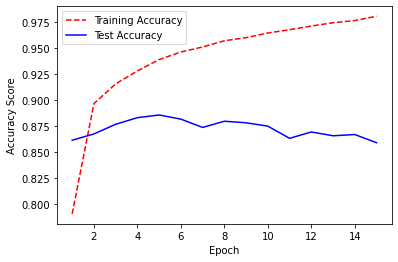

In [17]:
# get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

# visualize accuracy history
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()

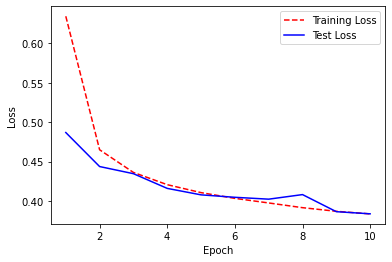

In [23]:
# REDUCING OVERFITTING WITH WEIGHT REGULARIZATION

# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, 
                         activation="sigmoid"))
# Compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=10,
                     verbose=0,
                     batch_size=100,
                     validation_data=(features_test, target_test))


# get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

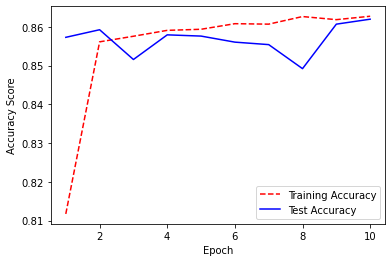

In [24]:
# get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

# visualize accuracy history
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()

In [27]:
# REDUCING OVERFITTING WITH EARLY STOPPING

# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss',
                          patience=3),
            ModelCheckpoint(filepath='best_model.h5',
                           monitor='val_loss',
                           save_best_only=True)]

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=20,
                     callbacks=callbacks,
                     verbose=0,
                     batch_size=100,
                     validation_data=(features_test, target_test))

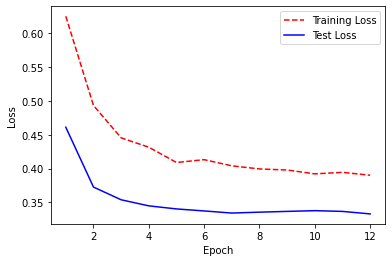

In [31]:
# REDUCING OVERFITTING WITH DROPOUT

# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# start neural network
network = models.Sequential()

# add a droupout layer before input
network.add(layers.Dropout(0.2, 
                           input_shape=(number_of_features,)))
# add dense ReLU layer
network.add(layers.Dense(units=16,
                        activation='relu'))
# add a dropoutlayer before hidden layer
network.add(layers.Dropout(0.5))
# add dense ReLU layer
network.add(layers.Dense(units=16,
                        activation='relu'))
# add dropout layer before hidden layer
network.add(layers.Dropout(0.5))
# add dense sigmoid layer
network.add(layers.Dense(units=1,
                       activation='sigmoid'))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=12, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

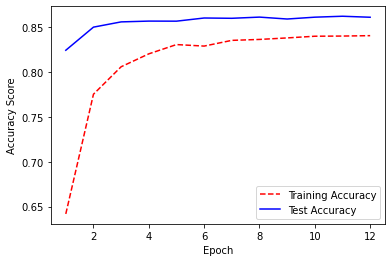

In [32]:
# get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')

# visualize accuracy history
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()

In [5]:
# SAVING MODEL TRAINING PROGRESS

# set random seed
np.random.seed(0)
# set number of features
number_of_features = 1000

# load data and target vector
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)

# convert movie review data to a one-hot encoded deature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

# start neural network
network = models.Sequential()

# add dense ReLU layer
network.add(layers.Dense(units=16,
                        activation='relu',
                        input_shape=(number_of_features,)))
# add dense relu layer
network.add(layers.Dense(units=16,
                        activation='relu'))
# add dense sigmoid layer
network.add(layers.Dense(units=1,
                        activation='sigmoid'))

# compile network
network.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

# set callback function to save best model
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]

# train neural network
history = network.fit(features_train,
                     target_train,
                     epochs=3,
                     callbacks=checkpoint,
                     verbose=0,
                     batch_size=100,
                     validation_data=(features_test, target_test))

In [8]:
# K-FOLD CROSS-VALIDATING NEURAL NETWORKS

# set random seed
np.random.seed(0)
# number of features
number_of_features = 100

# generate features matrix and target vector
features, target = make_classification(n_samples=10_000,
                                      n_features = number_of_features,
                                      n_informative=3,
                                      n_redundant=0,
                                      n_classes=2,
                                      weights = [0.5, 0.5],
                                      random_state=0)

# create function returning a compiled network
def create_network():
    
    # start network
    network = models.Sequential()
    
    # add layers
    network.add(layers.Dense(units=16,
                            activation='relu',
                            input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16,
                            activation='relu'))
    network.add(layers.Dense(units=1,
                            activation='sigmoid'))
    # compile network
    network.compile(loss='binary_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])
    return network

# wrap Keras madel so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                epochs=10,
                                batch_size=100,
                                verbose=0)

# evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)

C:\Users\antch\AppData\Local\Temp/ipykernel_2816/85573753.py:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  neural_network = KerasClassifier(build_fn=create_network,


array([0.91001797, 0.89558953, 0.86648667])

In [ ]:
# TUNING NEURAL NETWORK

# Set random seed
np.random.seed(0)
# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# create function returning a compiled network
def create_network(optimizer='rmsprop'):
    
    # start network
    network = models.Sequential()
    
    # add layers
    network.add(layers.Dense(units=16,
                            activation='relu',
                            input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16,
                            activation='relu'))
    network.add(layers.Dense(units=1,
                            activation='sigmoid'))
    # compile network
    network.compile(loss='binary_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])
    return network

# wrap Keras model so it can be used by sklearn
neural_network = KerasClassifier(build_fn=create_network,
                                verbose=0)

# create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

# create hyperparameter options
hyperparameters = dict(optimizer=optimizers, 
                       epochs=epochs, 
                       batch_size=batches)
# create grid search
grid = GridSearchCV(estimator=neural_network,
                   param_grid=hyperparameters)
# fit grid search
grid_result = grid.fit(features, target)
# view params
grid_result.best_params_

C:\Users\antch\AppData\Local\Temp/ipykernel_2816/3414743405.py:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  neural_network = KerasClassifier(build_fn=create_network,
